# Regresja liniowa

Regresja to zadanie identyfikacji funkcji przekształcającej dane. W przypadku uczenia maszynowego, poszukiwana funkcja ma postać parametryczną, a celem uczenia jest określenie jej parametrów, które maksymalizują zgodność transformacji argumentów w przypisane tym argumentom wartości (etykiety). 




[0.76268412 1.30114566]


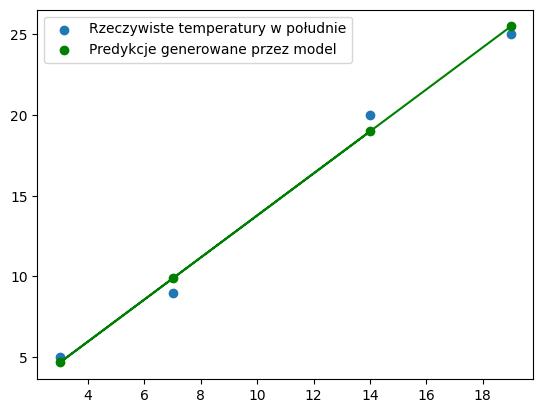

In [2]:
# Przykład: prosty problem regresji liniowej (argumenty skalarne)

import numpy as np
import matplotlib.pyplot as plt

# Dane (x) + etykiety (t) - np. zebrane na podstawie posiadanych informacji z przeszłości. 
# Etykieta to np. temperatura w południe, informacja użyta do jej przewidzenia to
# temp. o 7 rano
x = np.array([14,7,3,19])
t = np.array([20,9,5,25])

# Regresja liniowa: wyznaczenie parametrów modelu liniowego, wyjaśniającego przekształcenie x->t
# Macierz rozszerzona danych (zawierająca wiersz '1' niezbędny do uwzględnienia komponentu przesunięcia)
X = np.array([ np.ones(4), x ])
Theta = np.linalg.inv(X@X.T)@X@t

# Wynik przekształcenia próbek przez model
y = np.dot(X.T,Theta)
# Wizualizacja danych i generującej jej funkcji
plt.scatter(x,t, label="Rzeczywiste temperatury w południe")
plt.scatter(x,y, label="Predykcje generowane przez model", c="g")
plt.plot(x,y, c="g")
plt.legend()
print(Theta)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

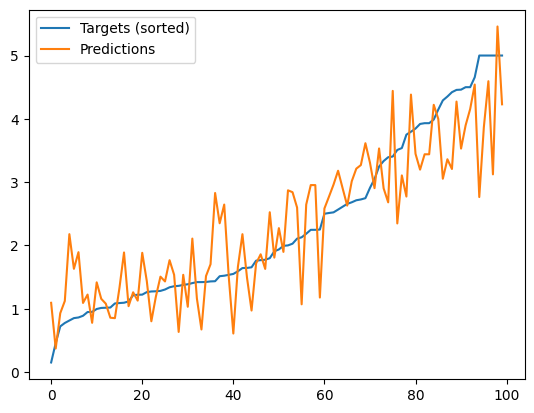

In [1]:
# Problem: prognozowanie ceny domu na podstawie 8 atrybutów
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
# Wczytanie danych
Dataset = fetch_california_housing()
Dane = Dataset.data # UWAGA: próbki to wiersze
Etykiety = Dataset.target
print(Dataset.DESCR)
# Wybór losowego podzbióru n-próbek
n=100
idx = np.random.randint(Etykiety.shape[0],size=n)
X_small = Dane[idx,:]
t_small = Etykiety[idx]
# Posortowanie danych dla celów wizualizacji
order = np.argsort(t_small)
t_sorted = t_small[order]
X_sorted = X_small[order,:]
# Utworzenie macierzy danych dla algorytmu regresji liniowej
# - dodanie kolumny z samymi '1' na końcu
X = np.c_[X_sorted, np.ones(X_sorted.shape[0])]
# Obliczenie wektora parametrów
Theta = np.linalg.inv(X.T@X)@X.T@t_sorted
y = X@Theta
plt.plot(t_sorted, label="Targets (sorted)")
plt.plot(y, label="Predictions")
plt.legend()
# wektor parametrów
print("Znaleziony wektor parametrów: "+str(Theta))